# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#откроем нужные библиотеки и посмотрем на инфо о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

is_apartment - должен быть тип bool
floors_total - должен быть тип int
days_exposition - тип должен быть int
parks_around3000 - тип должен быть int
ponds_around3000 - тип должен быть int
days_exposition - тип должен быть int
first_day_exposition - object - должен быть тип datetime

In [2]:
#посмотрим на содержание таблицы
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Даже по первым 10 строкам датафрейма видно, что необходима предобработка данных
Необходимо:
-изменить тип данных
-заполнить пропуски, где это необходимо

In [3]:
#заполняем пропуски и меням типы данных
data['balcony'].isnull().sum()

11519

In [4]:
data['balcony']=data['balcony'].fillna(0) # заполняем пропуски где 0 - это отсутсвие балкона
data['balcony']=data['balcony'].astype('int64') #меняем тип данных
data['balcony'].isnull().sum()

0

In [5]:
data['is_apartment'].isnull().sum()

20924

In [6]:
data['is_apartment']=data['is_apartment'].fillna(0) #ставим 0 - это не аппартамент
data['is_apartment'].isnull().sum()

0

In [7]:
data['is_apartment']=data['is_apartment'].astype('bool') # переводим в булево значение (сам столбец это подразумевает)

In [8]:
#переведем столбец в формат времени: год, месяц, день , т.к. часы, минуты и секунды не указаны
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [9]:
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

In [10]:
median_ceiling_height=data['ceiling_height'].median()
data['ceiling_height'].fillna(median_ceiling_height,inplace=True)

Заполнили средним значением

In [11]:
data['ceiling_height']=data['ceiling_height'].astype('float64')

In [12]:
data['ceiling_height'].isna().sum()

0

In [13]:
data.dropna(subset=['locality_name'],inplace=True)
data['locality_name'].isna().sum()

0

In [14]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,2.65,NaN,30.80,4,False,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,2.65,NaN,20.75,1,False,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,2.65,NaN,38.40,12,False,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,2.65,NaN,47.10,8,False,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,2.65,NaN,NaN,9,False,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.80,NaN,NaN,3,False,...,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,2.65,NaN,31.70,20,False,...,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,2.65,NaN,45.38,6,False,...,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,2.65,NaN,50.40,18,False,...,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [15]:
data['floors_total'].isnull().sum()

85

In [16]:
# код ревьюера
data[data['floors_total'] < data['floor']].shape[0]

0

In [17]:
coefficient = (data['kitchen_area'] / data['total_area']).mean()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * coefficient)

### Посчитайте и добавьте в таблицу новые столбцы

In [18]:
#цена одного квадратного метра
data['price_metr2'] = data['last_price'] / data['total_area']

In [19]:
#день недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [20]:
#месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

In [21]:
#год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [22]:
#тип этажа квартиры
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

In [23]:
#расстояние до центра города в километрах
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 23650, dtype: float64

### Проведите исследовательский анализ данных

<AxesSubplot:>

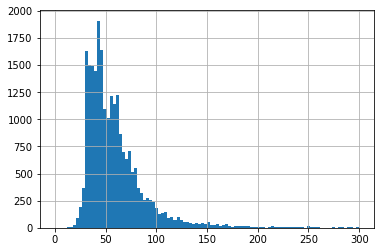

In [24]:
data['total_area'].hist(bins=100,range=(0,300))

Больше всего продаются квартиры площадью 45-49 м2

<AxesSubplot:>

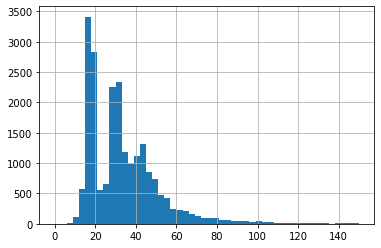

In [25]:
data['living_area'].hist(bins=50,range=(0,150))

Больше всего живут в квартирах с жилой площадью 17-20 м2, 28-35м2 и 41-45 м2 - однушки, двушки, трешки типичных советских-постсоветских планировок

<AxesSubplot:>

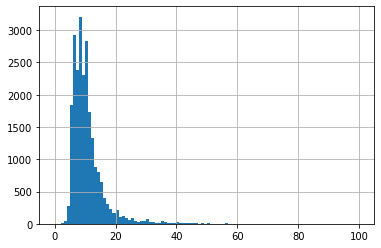

In [26]:
data['kitchen_area'].hist(bins=100,range=(0,100))

Самая распространенная площадь кухни - 7 - 15 м2

<AxesSubplot:>

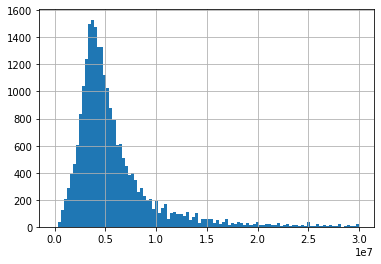

In [27]:
data['last_price'].hist(bins=100,range=(0,30000000))

Самый популярный ценник 3млн руб

<AxesSubplot:>

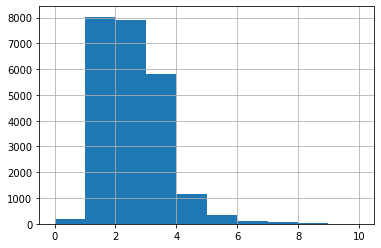

In [28]:
data['rooms'].hist(bins=10,range=(0,10))

Популярнее всего 1-3 комнатные

<AxesSubplot:>

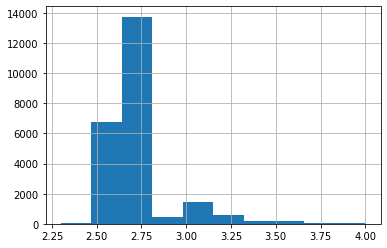

In [29]:
data['ceiling_height'].hist(bins=10,range=(2.3,4))

Самая популярная высота потолков - 2,65-2,80м

<AxesSubplot:>

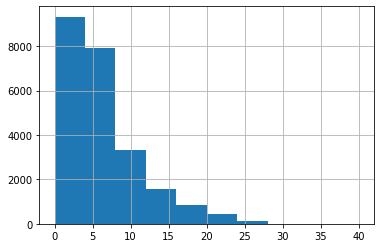

In [30]:
data['floor'].hist(bins=10,range=(0,40))

Больше всего квартир выставленных на продажу располагаются на 1-4 этажах

<AxesSubplot:>

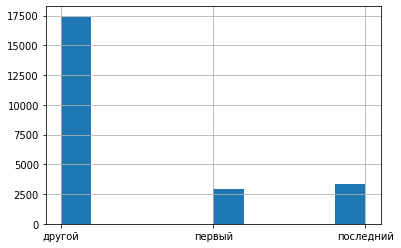

In [31]:
data['floor_category'].hist(bins=10)

Подавляющее число людей живет не на первом и не на последнем этажах

<AxesSubplot:>

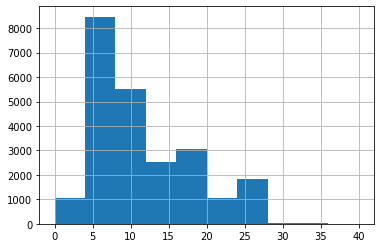

In [32]:
data['floors_total'].hist(bins=10, range=(0,40))

Дома в основном 4-7 этажные

<AxesSubplot:>

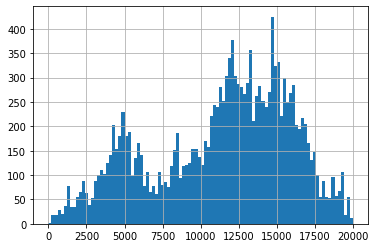

In [33]:
data['cityCenters_nearest'].hist(bins=100,range=(0,20000))

Жилые дома на продажу располагаются в основном в диапазон от 10 000 до 17 500 метров от центра города

<AxesSubplot:>

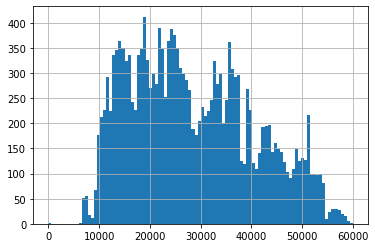

In [34]:
data['airports_nearest'].hist(bins=100,range=(0,60000))

До ближайшего аэропорта в среднем 10-25 км (скорее всего это жилье в самом Петербурге) и 30-35км (скорее всего на таком расстоянии от аэропорта (Пулково??) находятся самые населенные пригороды Петербурга)

<AxesSubplot:>

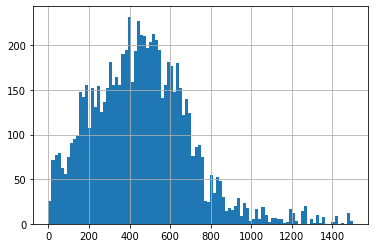

In [35]:
data['parks_nearest'].hist(bins=100,range=(0,1500))

До ближайшего парка 180-650 метров, парки располагаются в пешей доступности для большинства будущих обладателей квартир

<AxesSubplot:>

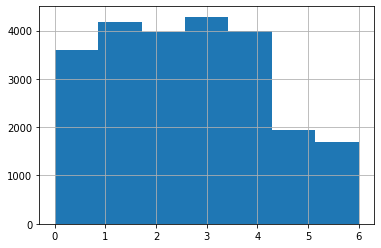

In [36]:
data['weekday_exposition'].hist(bins=7)

Объявления размещают чаще в будни

<AxesSubplot:>

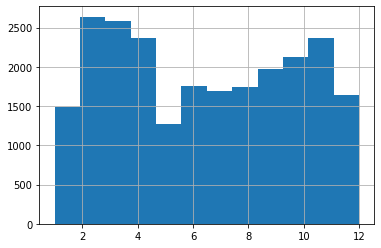

In [37]:
data['month_exposition'].hist(bins=12)

Прослеживается сезонность: в мае, летом и январе объявлний меньше - каникулы и сезон отпусков

In [38]:
#изучаем как быстро продавались квартиры
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

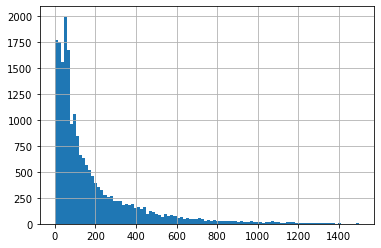

In [39]:
data['days_exposition'].hist(bins=100,range=(0,1500))

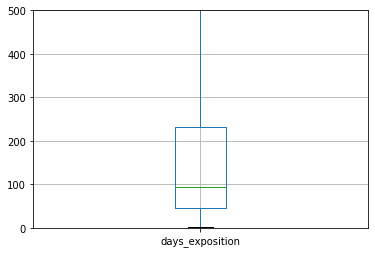

In [40]:
plt.ylim(0,500)
data.boxplot(column='days_exposition') 
plt.show()

Из диаграммы размаха видно что:
    медиана - 95 дней
    квартиры в основном продают в промежутке от 45 до 199 дней
    быстрые продажи - от 0 до 45 дней
    необычно долгие - от 199 до 425 дней

0.6537428966335393

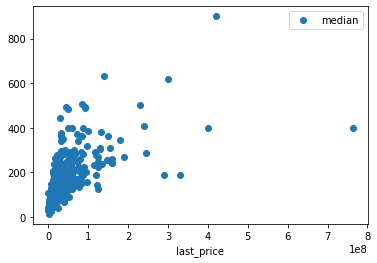

In [41]:
#зависимость цены от общей площади
pivot_table_total_area = data.pivot_table(index = 'last_price', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['last_price'].corr(data['total_area'])

зависимость цены от общей площади достаточно прослеживается, коэффициент корреляции пирсона: 0,65

0.5665168840375522

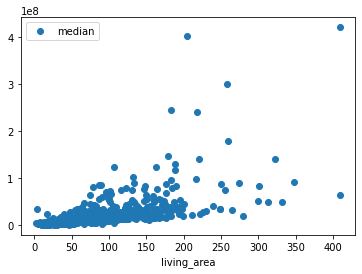

In [42]:
#зависимость цены от жилой площади
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o')

pivot_table_living_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

зависимость цены от жилой площади прослеживается, но незначительна, коэффициент корреляции пирсона: 0,56

0.5169639943125026

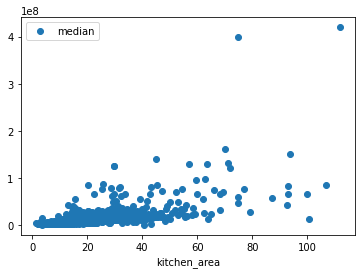

In [43]:
#зависимость цены от площади кухни
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y = 'median', style = 'o')

pivot_table_kitchen_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

зависимость цены от жилой площади слабая, коэффициент корреляции пирсона: 0,44

Вывод ниже

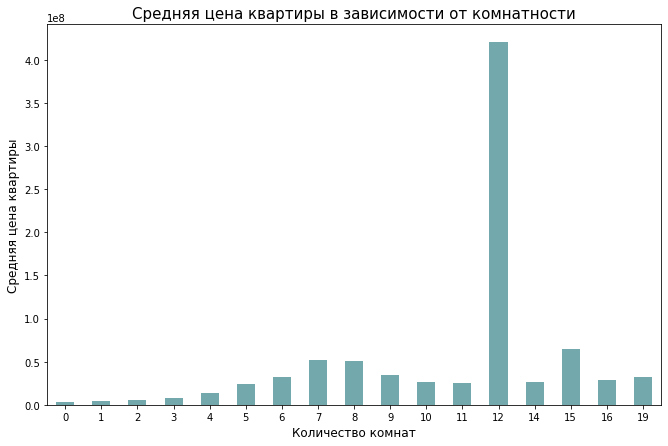

In [44]:
# код ревьюера


data.groupby('rooms')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от комнатности', size=15)
plt.xlabel('Количество комнат', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

Наиболее дешевые квартиры на первых 4х этажах
Скорее всего это связано с тем, что в категорию до 4х этажей попадает большинство домов, включая города в области (где превалирует низкая этажность и более низкая стоимость жилья)

,mean,count,median
floor_category,,,
первый,82302.435016,2887,81309.398099
последний,93024.640818,3355,87479.935795


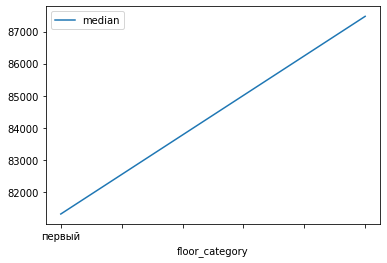

In [45]:
#зависимость цены от категории этажа
pivot_table_floor_category = data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_metr2', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

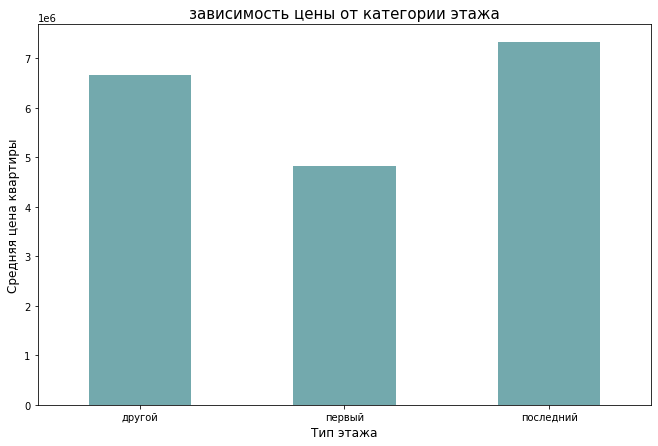

In [46]:
data.groupby('floor_category')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('зависимость цены от категории этажа', size=15)
plt.xlabel('Тип этажа', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

наиболее дешевые квартиры на первом этаже

,mean,count,median
weekday_exposition,,,
1,99724.551947,4175,95634.095634
2,99605.973811,3966,95473.807179
3,100193.163918,4286,95152.587607
0,99470.371195,3606,94703.958403
4,98987.215358,3992,94608.145294
6,97763.149550,1692,94594.594595
5,99066.258044,1933,93548.387097


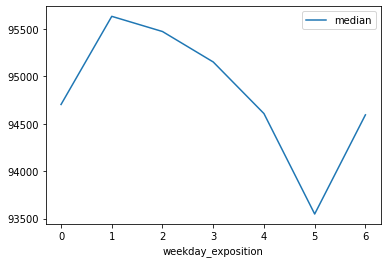

In [47]:
#зависимость цены от дня недели размещения
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_metr2', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

в целом зависимость цены от дня недели отсутвует (в рамках погрешности)

,mean,count,median
month_exposition,,,
4,101956.699581,2373,96451.612903
8,100147.231988,1742,96103.238866
11,99254.440753,2367,95625.000000
9,100490.822517,1979,95608.782435
3,98997.838525,2582,95293.466224
1,99838.433932,1491,95209.580838
7,99650.840621,1690,95023.940820
2,98769.773236,2639,95000.000000
12,99501.624581,1638,94238.400488


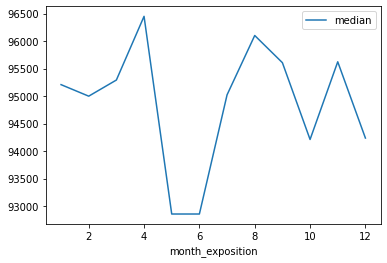

In [48]:
#зависимость цены от месяца публикации
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_metr2', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

По месяцам явная сезонность: май, июнь - самая низкая цена

,mean,count,median
year_exposition,,,
2014,124302.355703,136,106901.898734
2019,107123.780305,2879,103305.785124
2018,97800.065860,8512,95704.323236
2015,104719.098541,1173,93396.226415
2017,97637.360152,8185,92569.659443
2016,98295.372599,2765,91666.666667


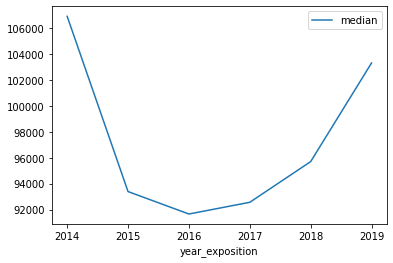

In [49]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_metr2', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Самая низкая цена была 2015 - 2018 год
Скорее всего в эти года было наибольшее предложение жилья или же это был период между кризисами (как известно, в кризисы возрастает спрос на жилье и как следствие при том же предложении растет цена, люди из-за чувства страха стараются вкладываться в жилье как базовую потребность в жилище, комфорте и безопасности, плюс в кризисы возрастают инфляционные ожидания, соответственно спрос опять же увеличивается)

In [50]:
#средняя цена одного квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений
pivot_table_locality_name = data.pivot_table(index = 'locality_name', values = 'price_metr2', aggfunc=['count', 'mean'])
pivot_table_locality_name.columns = ['count', 'mean']
pivot_table_locality_name = pivot_table_locality_name.sort_values('count', ascending = False).head(10)
pivot_table_locality_name

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


In [51]:
#максимальная стоимость
pivot_table_locality_name[pivot_table_locality_name['mean']==pivot_table_locality_name['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794


In [52]:
#минимальная стоимость
pivot_table_locality_name[pivot_table_locality_name['mean']==pivot_table_locality_name['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.909153


,price_metr2
cityCenters_nearest_km,
0.0,245833.530289
1.0,177005.407676
2.0,157849.007329
3.0,121387.453704
4.0,133282.874761
5.0,140509.789046
6.0,151012.193621
7.0,156176.879664
8.0,125671.442742


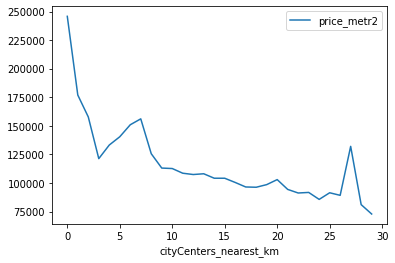

In [53]:
#зависимость цены на квадратный метр в Санкт-Петербурге от расстояния до центра в км
pivot_table_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'price_metr2', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

Чем ближе к центру, тем квартиры явно дороже
Условный "центр" для рынка жилья в СПб радиусом 10км

### Общий вывод

В рамках исследования рынка недвижимости города Санкт-Петербур и Ленинградской области было выявлено следующее:
-проведена предобработка данных для получения наиболее корректных результатов исследовани

Соствлен следующий портрет наиболее популярного объявления и выявлены следующие особенности:

-больше всего продаются квартиры площадью 45-49 м2
-больше всего квартир выставленных на продажу располагаются на 1-4 этажах
-дома в основном 4-7 этажные
-жилые дома на продажу располагаются в основном в диапазоне от 10 000 до 17 500 метров от центра города
-до ближайшего аэропорта в среднем 10-25 км
-квартиры в основном продают в промежутке от 45 до 199 дней

-зависимость цены от общей площади достаточно прослеживается
-зависимость цены от жилой площади прослеживается
-наиболее дешевые квартиры на первых 4х этажах
-по месяцам явная сезонность: май, июнь - самая низкая цена
-выявили 10 населенных пунктов с наибольним количеством объявлений
-наиболее дорогое жилье в Санкт-Петербурге
-наиболее дешевое в Выборге



В связи с этим рекомендую:
-учитывать эти факторы для увеличения продаж и следовательно повышением уровня удовлетворенности сервисом
-работать над увеличением продаж через сервис квартир в центреЮ обладающих наибольшей стоимостью (для получения большей прибыли с комиссии)
-работать над уменьшением срока продажи квартир, для увеличения удовлетворенности клиентов
-сформировать портрет среднего клиента сервиса, учитывать его при масштабировании
-провести отельное исследование почему определенные группы клиентов менее активны в использовании сервиса и работать над их привлечением